In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [14]:
from keras.models import load_model

model = load_model('cats_and_dogs_small_2.h5')
model.summary()  # As a reminder.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [15]:
img_path = r'D:\keras\cat and dog\test\cats/cat.1700.jpg'

# We preprocess the image into a 4D tensor
from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
# Remember that the model was trained on inputs
# that were preprocessed in the following way:
img_tensor /= 255.

# Its shape is (1, 150, 150, 3)
print(img_tensor.shape)

(1, 150, 150, 3)


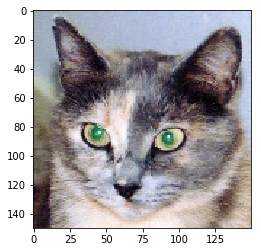

In [16]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])


In [20]:
from keras import models

# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers[:8]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [21]:
activation_model.output

[<tf.Tensor 'conv2d_9_1/Relu:0' shape=(?, 148, 148, 32) dtype=float32>,
 <tf.Tensor 'max_pooling2d_9_1/MaxPool:0' shape=(?, 74, 74, 32) dtype=float32>,
 <tf.Tensor 'conv2d_10_1/Relu:0' shape=(?, 72, 72, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_10_1/MaxPool:0' shape=(?, 36, 36, 64) dtype=float32>,
 <tf.Tensor 'conv2d_11_1/Relu:0' shape=(?, 34, 34, 128) dtype=float32>,
 <tf.Tensor 'max_pooling2d_11_1/MaxPool:0' shape=(?, 17, 17, 128) dtype=float32>,
 <tf.Tensor 'conv2d_12_1/Relu:0' shape=(?, 15, 15, 128) dtype=float32>,
 <tf.Tensor 'max_pooling2d_12_1/MaxPool:0' shape=(?, 7, 7, 128) dtype=float32>]

In [22]:
activation_model.input

<tf.Tensor 'conv2d_9_input_1:0' shape=(?, 150, 150, 3) dtype=float32>

In [23]:
# This will return a list of 5 Numpy arrays:
# one array per layer activation
activations = activation_model.predict(img_tensor)

In [24]:
activations

[array([[[[0.25555035, 0.04447393, 0.08292828, ..., 0.        ,
           0.0349666 , 0.06980899],
          [0.25203362, 0.03513432, 0.0846647 , ..., 0.        ,
           0.04174991, 0.06243315],
          [0.26761684, 0.03909065, 0.08515418, ..., 0.        ,
           0.03272603, 0.0630083 ],
          ...,
          [0.3332462 , 0.05459141, 0.10754061, ..., 0.        ,
           0.05129372, 0.09656909],
          [0.3289534 , 0.05112962, 0.11161034, ..., 0.        ,
           0.05433626, 0.0905534 ],
          [0.33437318, 0.05263449, 0.10652806, ..., 0.        ,
           0.05198251, 0.09103808]],
 
         [[0.25358963, 0.05086102, 0.07984636, ..., 0.        ,
           0.03429184, 0.07279772],
          [0.25242826, 0.04269976, 0.08347978, ..., 0.        ,
           0.04262426, 0.06483585],
          [0.26330855, 0.03276374, 0.0839088 , ..., 0.        ,
           0.03385951, 0.0633141 ],
          ...,
          [0.33748996, 0.04839981, 0.10303686, ..., 0.        ,
   

In [25]:
type(activations)

list

In [28]:
img_tensor

array([[[[0.6431373 , 0.68235296, 0.7294118 ],
         [0.6313726 , 0.67058825, 0.7176471 ],
         [0.62352943, 0.67058825, 0.7254902 ],
         ...,
         [0.7764706 , 0.8392157 , 0.9411765 ],
         [0.78431374, 0.84705883, 0.9490196 ],
         [0.78431374, 0.84705883, 0.9490196 ]],

        [[0.627451  , 0.6666667 , 0.7137255 ],
         [0.6156863 , 0.654902  , 0.7019608 ],
         [0.6117647 , 0.65882355, 0.7137255 ],
         ...,
         [0.78039217, 0.84313726, 0.94509804],
         [0.7882353 , 0.8509804 , 0.9529412 ],
         [0.7882353 , 0.8509804 , 0.9529412 ]],

        [[0.6313726 , 0.67058825, 0.7176471 ],
         [0.62352943, 0.6627451 , 0.70980394],
         [0.61960787, 0.6666667 , 0.72156864],
         ...,
         [0.78039217, 0.84313726, 0.94509804],
         [0.78039217, 0.84313726, 0.94509804],
         [0.78039217, 0.84313726, 0.94509804]],

        ...,

        [[0.25882354, 0.19607843, 0.20784314],
         [0.21176471, 0.14509805, 0.16862746]

In [29]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


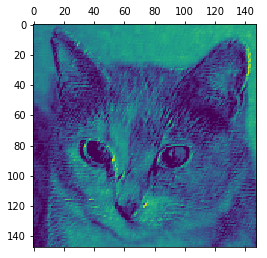

In [30]:
import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.show()

In [32]:
first_layer_activation[0, :, :, 3].shape

(148, 148)

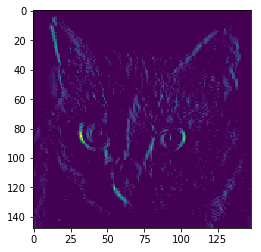

In [62]:
plt.imshow(first_layer_activation[0, :, :, 7], cmap='viridis')
plt.show()

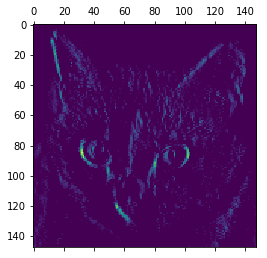

In [63]:
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')
plt.show()

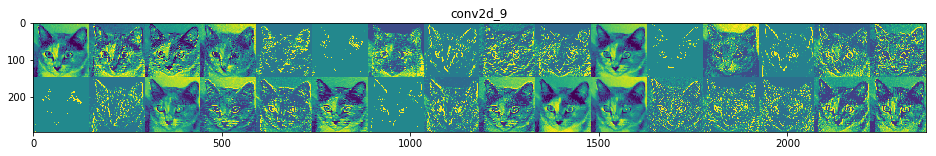

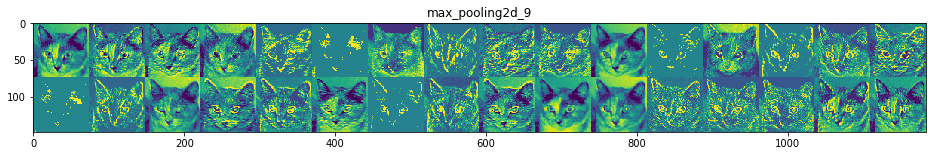

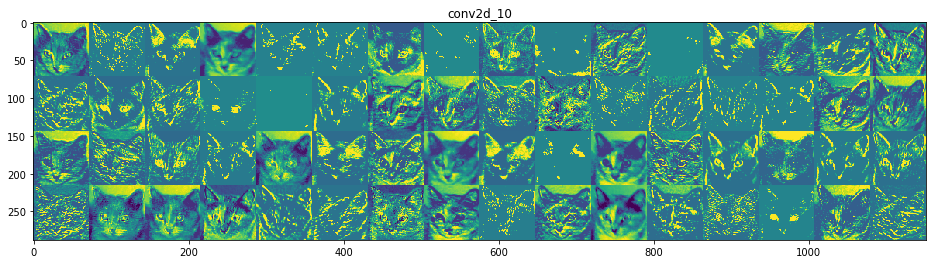

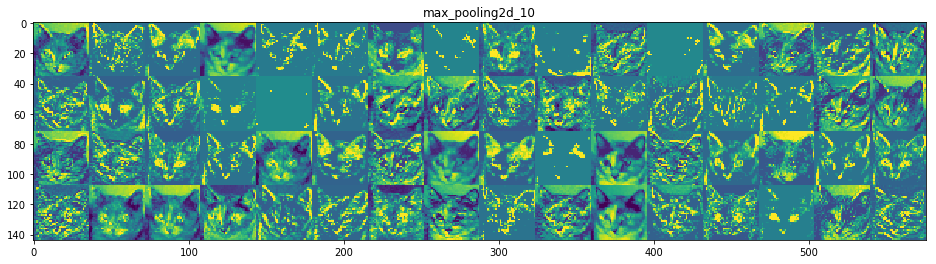

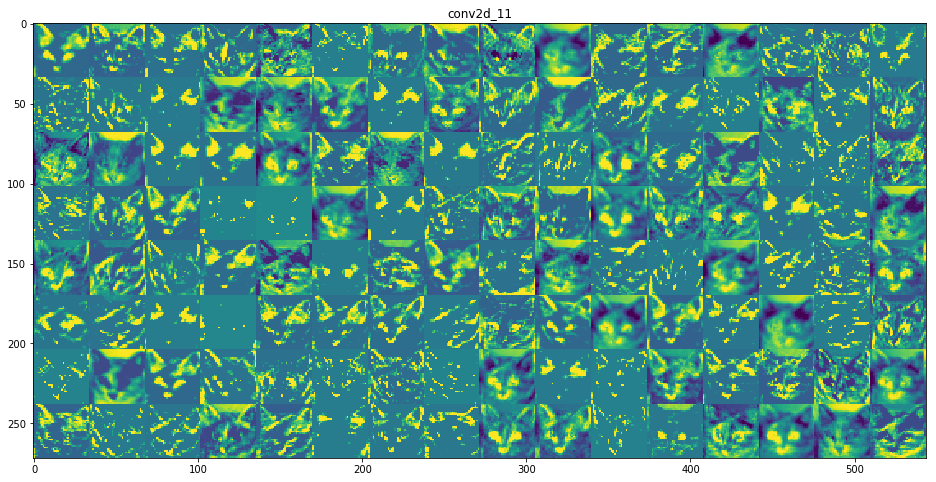

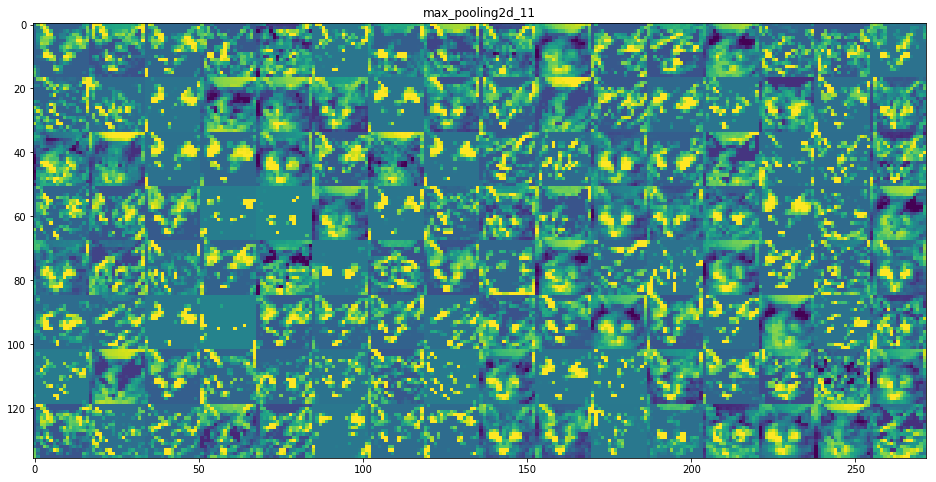

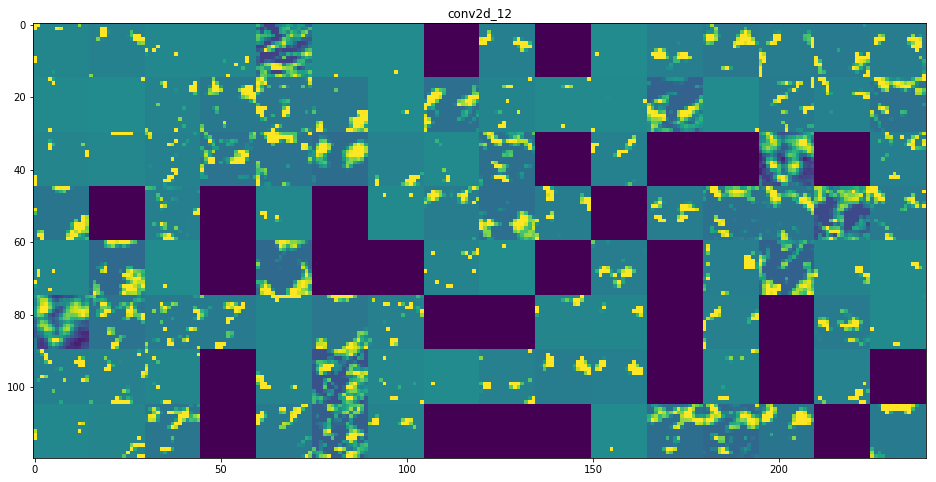

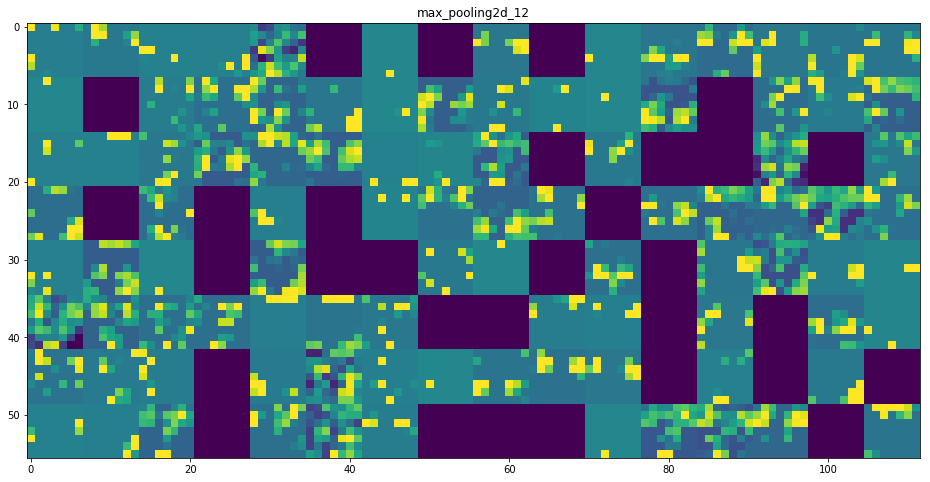

In [61]:
import keras

# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()

In [64]:
type(channel_image)

numpy.ndarray

In [51]:
channel_image.shape

(7, 7)

In [52]:
display_grid.shape

(56, 112)

In [65]:
model.output

<tf.Tensor 'dense_6_1/Sigmoid:0' shape=(?, 1) dtype=float32>

In [ ]:
from keras.applications import VGG16
from keras import backend as K

model = VGG16(weights='imagenet',
             #include_top=False
             )

layer_name = 'block3_conv1'
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

   163840/553467096 [..............................] - ETA: 28:31:03

In [67]:
loss

<tf.Tensor 'Mean:0' shape=() dtype=float32>

In [71]:
type(layer_output[:, :, :, filter_index])

tensorflow.python.framework.ops.Tensor